In [411]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [412]:
sp500_history = pd.read_csv("sp500_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [413]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [414]:
#sp500_returns
sp500_history = sp500_history.dropna().copy()
sp500_history.head()

Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93

In [415]:
sp500_history = sp500_history.rename(columns={'Close':'sp500_price'})
sp500_history.head()

sp500_price
Date                   
2012-10-01      1444.49
2012-10-02      1445.75
2012-10-03      1450.99
2012-10-04      1461.40
2012-10-05      1460.93

In [416]:
# Reading whale returns
whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [417]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [418]:
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [419]:
algo_returns = pd.read_csv("algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [420]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [421]:
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [422]:
combined = pd.concat([whale_returns, algo_returns, sp500_history],axis='columns',join='inner')
combined.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  sp500_price  
Date                               
2015-03-03 -0.000949      2107.78  
2015-03-04  0.002416      2098.53  
2015-03-05  0.004323      2101.04  
2015-03-06 -0.011460      2071.26  
2015-03-09  0.001303      2079.43

<AxesSubplot:title={'center':'daily_returns'}, xlabel='Date'>

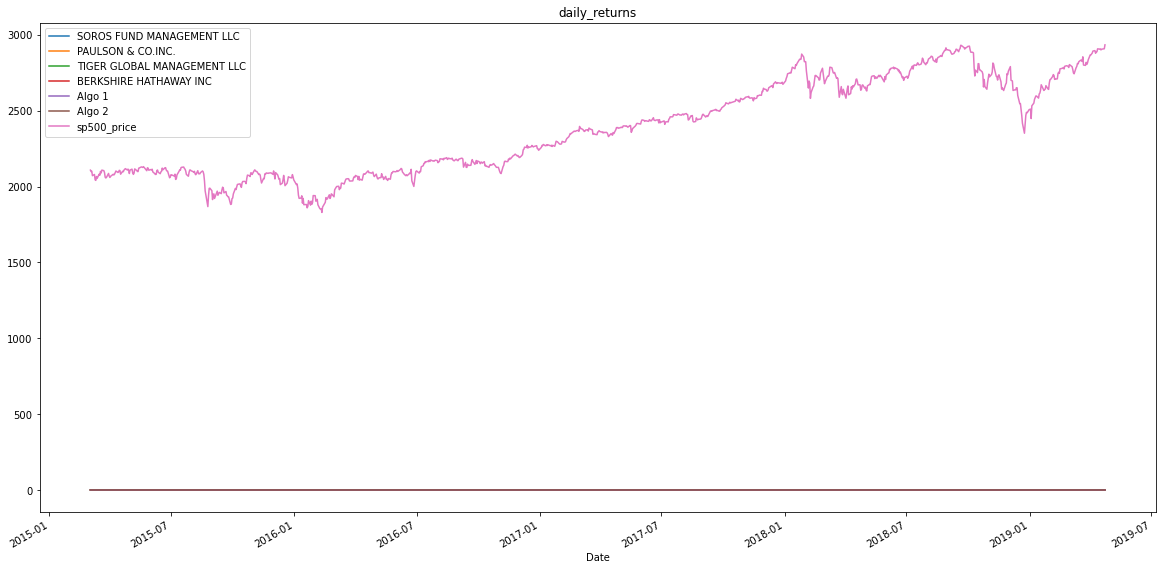

In [423]:
combined.plot(figsize=(20,10),title="daily_returns")

<AxesSubplot:title={'center':'cumulative_returns'}, xlabel='Date'>

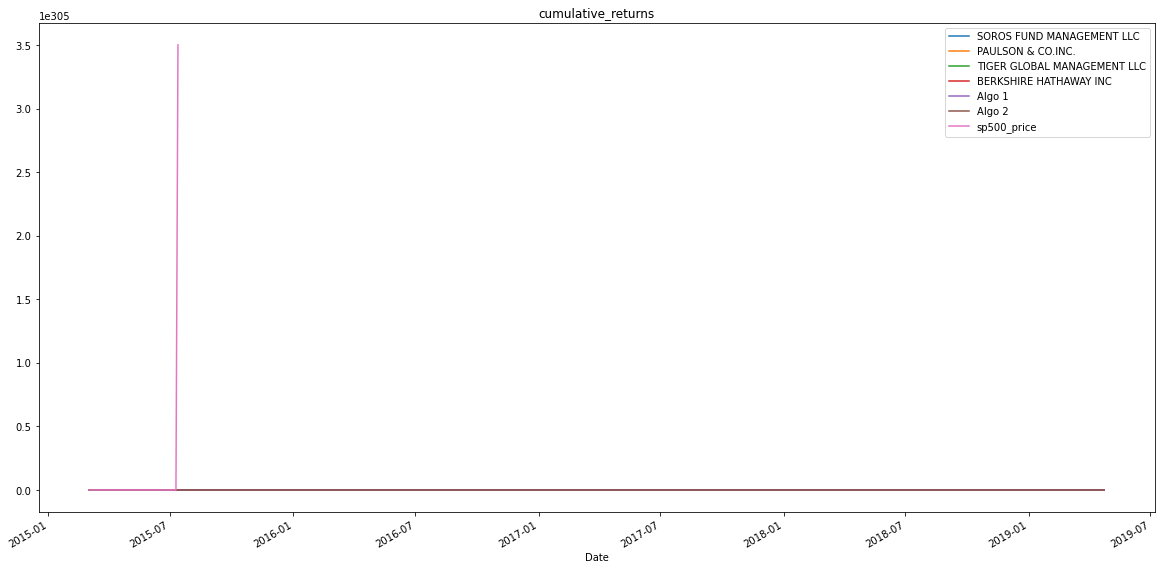

In [424]:
cumulative_returns = (1 + combined).cumprod()
cumulative_returns.plot(figsize=(20,10),title="cumulative_returns")

<AxesSubplot:title={'center':'portfolio_risk'}>

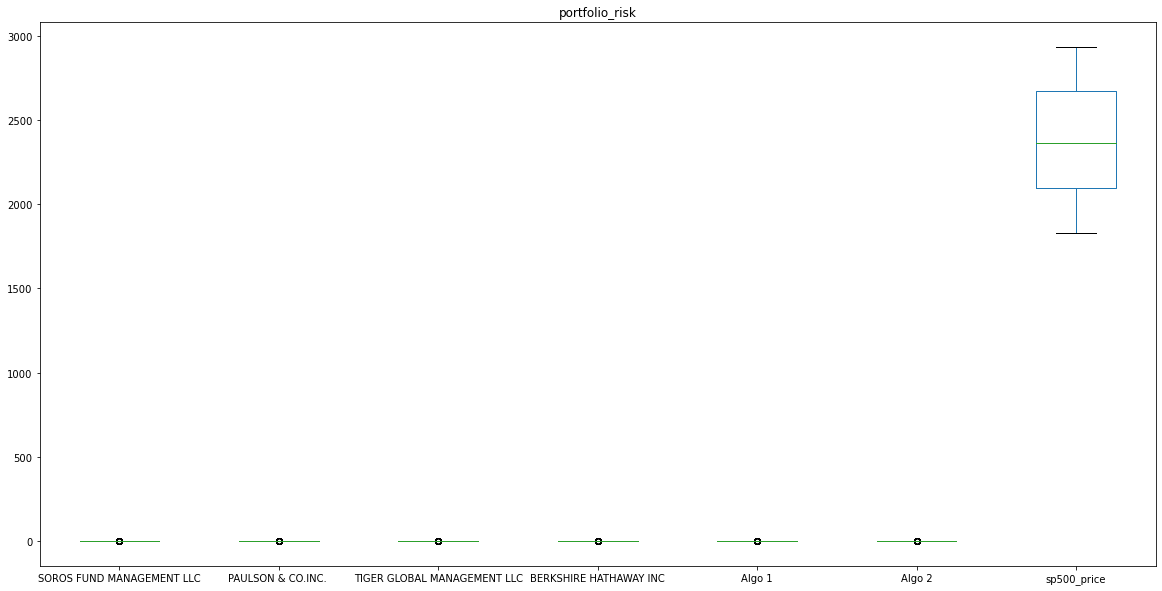

In [425]:
combined.plot.box(figsize=(20,10),title="portfolio_risk")

In [426]:
combined.std()

SOROS FUND MANAGEMENT LLC        0.007895
PAULSON & CO.INC.                0.007023
TIGER GLOBAL MANAGEMENT LLC      0.010894
BERKSHIRE HATHAWAY INC           0.012919
Algo 1                           0.007620
Algo 2                           0.008342
sp500_price                    305.852115
dtype: float64

In [427]:
combined["sp500_price"].std()

305.85211481718363

In [428]:
combined.std() > combined["sp500_price"].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
sp500_price                    False
dtype: bool

In [429]:
annualized_std = combined.std() * np.sqrt(252) 
annualized_std

SOROS FUND MANAGEMENT LLC         0.125335
PAULSON & CO.INC.                 0.111488
TIGER GLOBAL MANAGEMENT LLC       0.172936
BERKSHIRE HATHAWAY INC            0.205077
Algo 1                            0.120967
Algo 2                            0.132430
sp500_price                    4855.251803
dtype: float64

<AxesSubplot:xlabel='Date'>

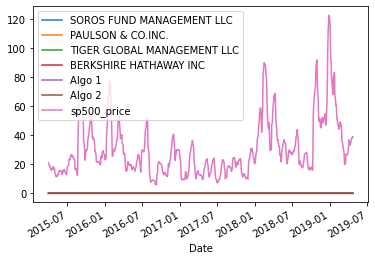

In [430]:
combined.rolling(window=21).std().plot()

In [431]:
whale_returns.rolling(window=21).std()
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [432]:
sp500_history.rolling(window=21).std()
sp500_history.head()

sp500_price
Date                   
2012-10-01      1444.49
2012-10-02      1445.75
2012-10-03      1450.99
2012-10-04      1461.40
2012-10-05      1460.93

In [433]:
algo_returns.rolling(window=21).std()
algo_returns.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

In [434]:
daily_returns = combined.pct_change()
daily_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                  -2.762070           -1.650792   
2015-03-05                   0.800968            0.257544   
2015-03-06                  -2.968465           -1.876837   
2015-03-09                  -1.073656           -2.182252   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                     4.113646               -1.641381  3.422374   
2015-03-05                    -1.929234                0.596558 -0.888803   
2015-03-06                    -4.601872               -2.947282  4.190043   
2015-03-09                    -1.688907               -0.873840  0.098917   

              Algo 2  sp500_price  
Date                               
2015-03-03       NaN          NaN  
2015-03-04 -3.544766    -0.004389  
2015-03-05  0.789231     0.001196  
2015-03-06 -3.650914    -0.014174  
2015-03-09 -1.113716     0.003944

<AxesSubplot:xlabel='Date'>

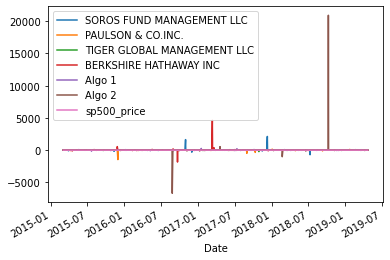

In [435]:
daily_returns.plot()

In [436]:
returns_correlation = combined.corr()
returns_correlation.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   

                             sp500_price  
SOROS FUND MANAGEMENT LLC       0.033918  
PAULSON & CO.INC.               0.036711  
TIGER GLOBAL MANAGEMENT LLC    -0.047823  
BERKSHIRE HATHAWAY INC          0.041547  
Algo 1                         -0.012608

<AxesSubplot:>

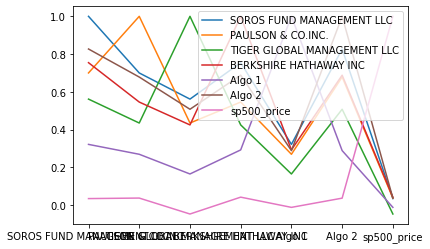

In [437]:
returns_correlation.plot()

<AxesSubplot:>

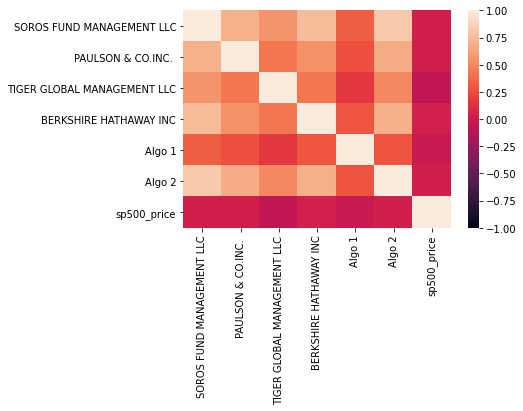

In [438]:
sns.heatmap(returns_correlation, vmin=-1, vmax=1)

In [439]:
returns_correlation.sum(axis=0).sort_values()

sp500_price                    1.088012
Algo 1                         2.322107
TIGER GLOBAL MANAGEMENT LLC    3.044124
PAULSON & CO.INC.              3.663719
BERKSHIRE HATHAWAY INC         3.746068
Algo 2                         4.025031
SOROS FUND MANAGEMENT LLC      4.197519
dtype: float64

In [440]:
daily_returns = combined.pct_change()
daily_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                  -2.762070           -1.650792   
2015-03-05                   0.800968            0.257544   
2015-03-06                  -2.968465           -1.876837   
2015-03-09                  -1.073656           -2.182252   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                     4.113646               -1.641381  3.422374   
2015-03-05                    -1.929234                0.596558 -0.888803   
2015-03-06                    -4.601872               -2.947282  4.190043   
2015-03-09                    -1.688907               -0.873840  0.098917   

              Algo 2  sp500_price  
Date                               
2015-03-03       NaN          NaN  
2015-03-04 -3.544766    -0.004389  
2015-03-05  0.789231     0.001196  
2015-03-06 -3.650914    -0.014174  
2015-03-09 -1.113716     0.003944

In [441]:
covariance = daily_returns['Algo 1'].cov(daily_returns['sp500_price'])
covariance

0.00012518664135951623

In [442]:
variance = daily_returns['sp500_price'].var()
variance

7.321363613824293e-05

In [443]:
sp500_price_beta = covariance / variance
sp500_price_beta

1.7098814915180172

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo 1 Returns vs. sp500_price Returns'}, xlabel='Date'>

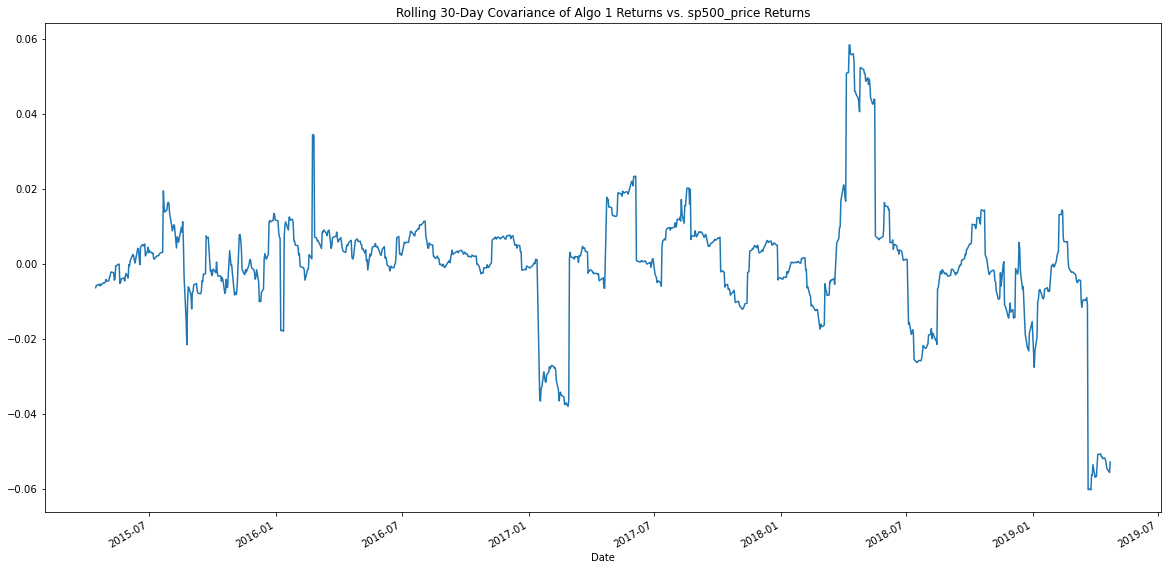

In [444]:
rolling_covariance = daily_returns['Algo 1'].rolling(window=30).cov(daily_returns['sp500_price'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo 1 Returns vs. sp500_price Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of sp500_price Returns'}, xlabel='Date'>

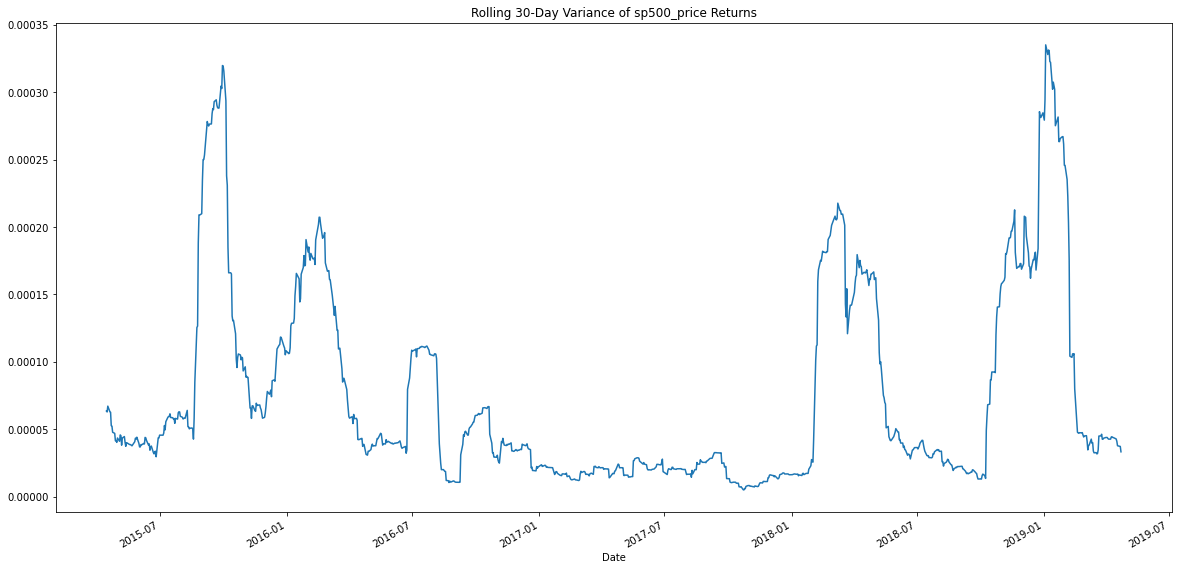

In [445]:
rolling_variance = daily_returns['sp500_price'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of sp500_price Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of sp500_price'}, xlabel='Date'>

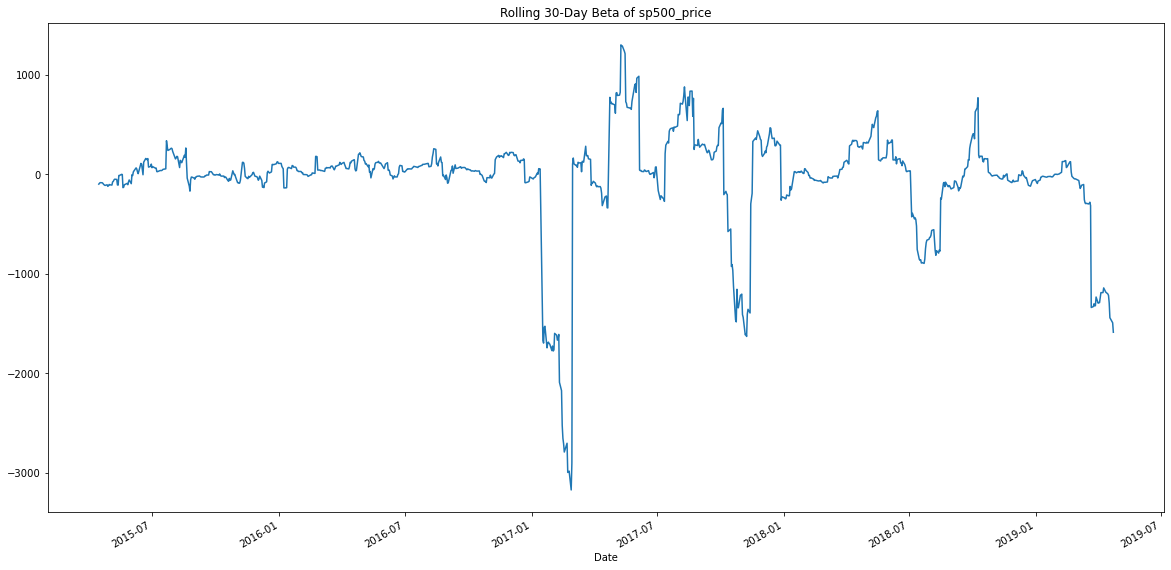

In [446]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of sp500_price')

In [447]:
daily_returns = combined.pct_change()
daily_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                  -2.762070           -1.650792   
2015-03-05                   0.800968            0.257544   
2015-03-06                  -2.968465           -1.876837   
2015-03-09                  -1.073656           -2.182252   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                     4.113646               -1.641381  3.422374   
2015-03-05                    -1.929234                0.596558 -0.888803   
2015-03-06                    -4.601872               -2.947282  4.190043   
2015-03-09                    -1.688907               -0.873840  0.098917   

              Algo 2  sp500_price  
Date                               
2015-03-03       NaN          NaN  
2015-03-04 -3.544766    -0.004389  
2015-03-05  0.789231     0.001196  
2015-03-06 -3.650914    -0.014174  
2015-03-09 -1.113716     0.003944

In [448]:
combined.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  sp500_price  
Date                               
2015-03-03 -0.000949      2107.78  
2015-03-04  0.002416      2098.53  
2015-03-05  0.004323      2101.04  
2015-03-06 -0.011460      2071.26  
2015-03-09  0.001303      2079.43

In [449]:
combined.ewm(halflife=21).mean()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000511           -0.000802   
2015-03-05                   0.001718            0.000878   
2015-03-06                  -0.000808           -0.000291   
2015-03-09                  -0.000511            0.000673   
...                               ...                 ...   
2019-04-16                   0.001480            0.000448   
2019-04-17                   0.001338            0.000223   
2019-04-18                   0.001341            0.000256   
2019-04-22                   0.001214            0.000009   
2019-04-23                   0.001407            0.000122   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.001532               -0.001089 -0.005320   
2015-03-05                    -0.000193                0.001603 -0.003817   
2015-03-06                    -0.002369               -0.002256 -0.004116   
2015-03-09                    -0.000616               -0.002128 -0.004400   
...                                 ...                     ...       ...   
2019-04-16                    -0.000813                0.001862  0.000912   
2019-04-17                    -0.000930                0.001906  0.000548   
2019-04-18                    -0.000881                0.001907  0.000511   
2019-04-22                    -0.000971                0.001809  0.000516   
2019-04-23                    -0.000729                0.002182  0.000661   

              Algo 2  sp500_price  
Date                               
2015-03-03 -0.000949  2107.780000  
2015-03-04  0.000761  2103.078678  
2015-03-05  0.001988  2102.376569  
2015-03-06 -0.001542  2094.208147  
2015-03-09 -0.000935  2091.054257  
...              ...          ...  
2019-04-16  0.001364  2796.694240  
2019-04-17  0.001150  2800.063005  
2019-04-18  0.001073  2803.471097  
2019-04-22  0.000975  2806.863991  
2019-04-23  0.001256  2810.981481  

[1043 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

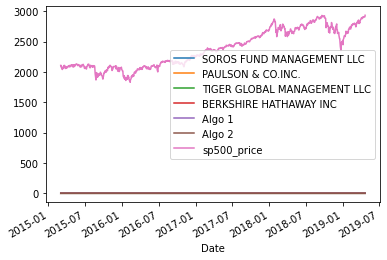

In [450]:
combined.plot()

<AxesSubplot:xlabel='Date'>

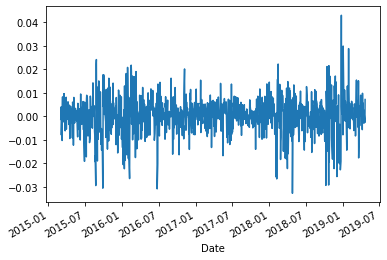

In [451]:
combined['SOROS FUND MANAGEMENT LLC'].plot()

In [452]:
combined.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp500_price'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

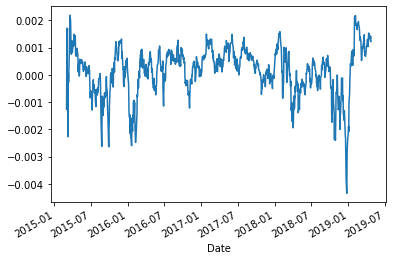

In [453]:
combined['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).mean().plot()

In [454]:
noncorrelated_daily_returns = daily_returns.drop(columns=['Algo 2', 'SOROS FUND MANAGEMENT LLC'])
noncorrelated_daily_returns.head()

PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date                                                          
2015-03-03                 NaN                          NaN   
2015-03-04           -1.650792                     4.113646   
2015-03-05            0.257544                    -1.929234   
2015-03-06           -1.876837                    -4.601872   
2015-03-09           -2.182252                    -1.688907   

            BERKSHIRE HATHAWAY INC    Algo 1  sp500_price  
Date                                                       
2015-03-03                     NaN       NaN          NaN  
2015-03-04               -1.641381  3.422374    -0.004389  
2015-03-05                0.596558 -0.888803     0.001196  
2015-03-06               -2.947282  4.190043    -0.014174  
2015-03-09               -0.873840  0.098917     0.003944

In [455]:
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios

PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -0.745412
sp500_price                    0.656761
dtype: float64

In [456]:
candidate_daily_returns = noncorrelated_daily_returns.drop(columns=['Algo 1'])
candidate_daily_returns.head()

PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date                                                          
2015-03-03                 NaN                          NaN   
2015-03-04           -1.650792                     4.113646   
2015-03-05            0.257544                    -1.929234   
2015-03-06           -1.876837                    -4.601872   
2015-03-09           -2.182252                    -1.688907   

            BERKSHIRE HATHAWAY INC  sp500_price  
Date                                             
2015-03-03                     NaN          NaN  
2015-03-04               -1.641381    -0.004389  
2015-03-05                0.596558     0.001196  
2015-03-06               -2.947282    -0.014174  
2015-03-09               -0.873840     0.003944

<AxesSubplot:>

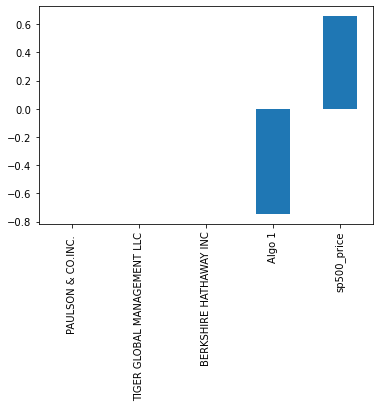

In [457]:
sharpe_ratios.plot.bar()

<AxesSubplot:xlabel='Date'>

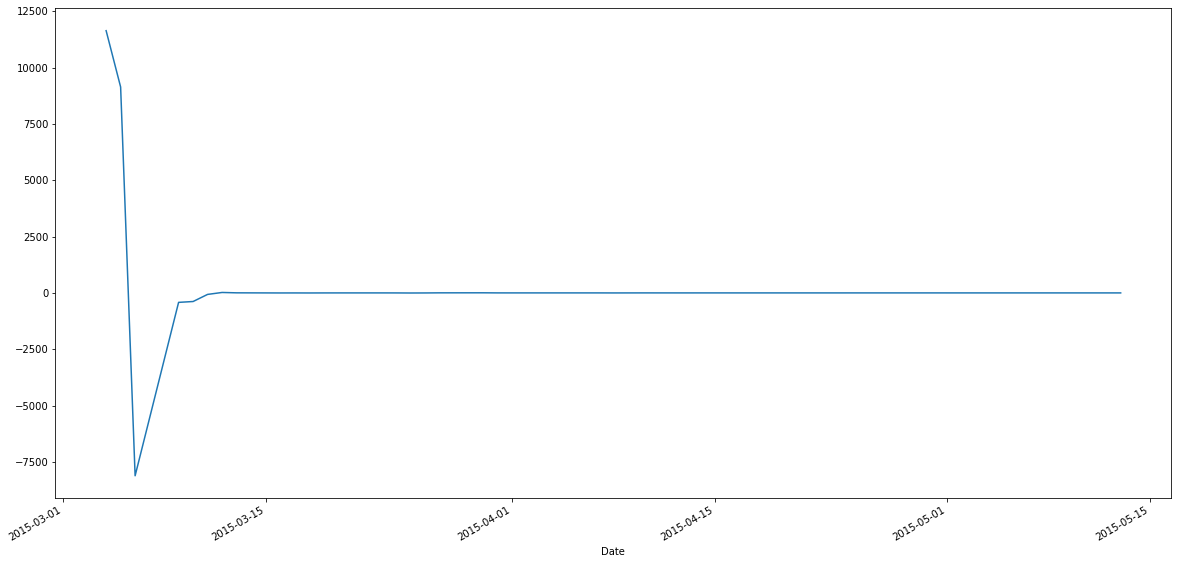

In [458]:
initial_investment = 10000
weights = [0.20, 0.20, 0.20, 0.20]

candidate_portfolio_returns = candidate_daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

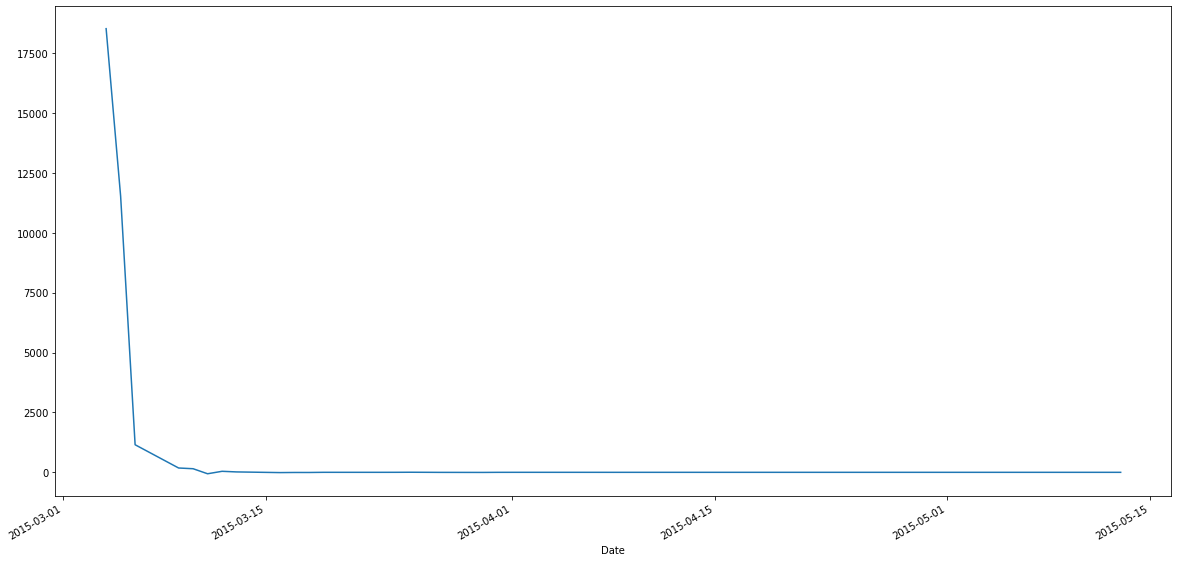

In [459]:
initial_investment = 10000
weights = [0.175, 0.185, 0.195, 0.205, 0.325]

noncorrelated_portfolio_returns = noncorrelated_daily_returns.dot(weights)
noncorrelated_cumulative_returns = (1 + noncorrelated_portfolio_returns).cumprod()
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_returns)
noncorrelated_cumulative_profits.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

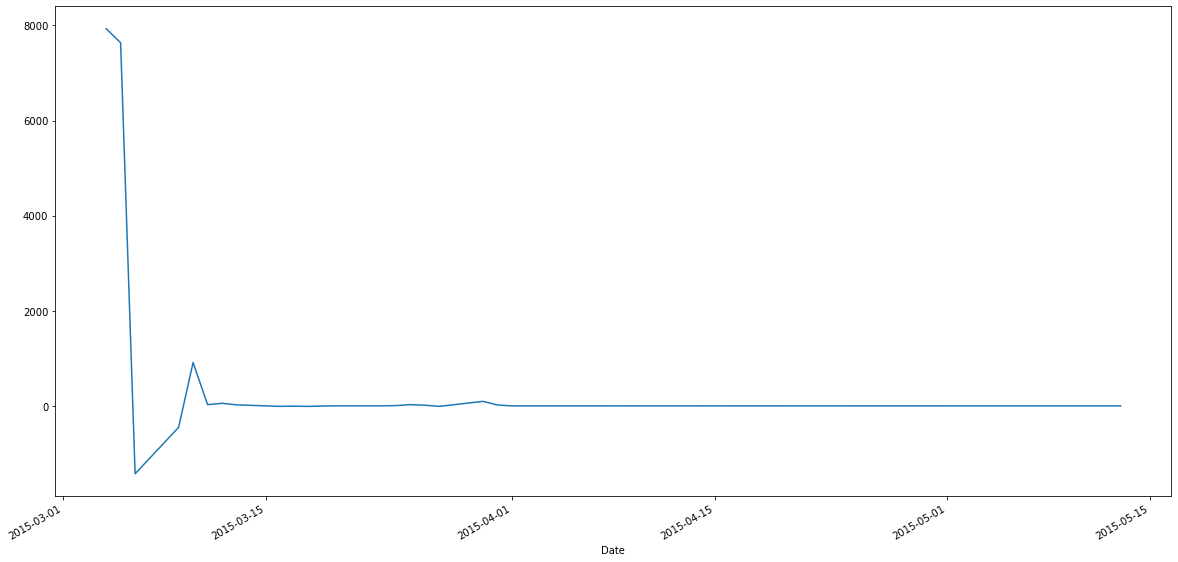

In [460]:
initial_investment = 10000
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

unoptimized_portfolio_returns = daily_returns.dot(weights)
unoptimized_cumulative_returns = (1 + unoptimized_portfolio_returns).cumprod()
unoptimized_cumulative_profits = (initial_investment * unoptimized_cumulative_returns)
unoptimized_cumulative_profits.plot(figsize=(20,10))

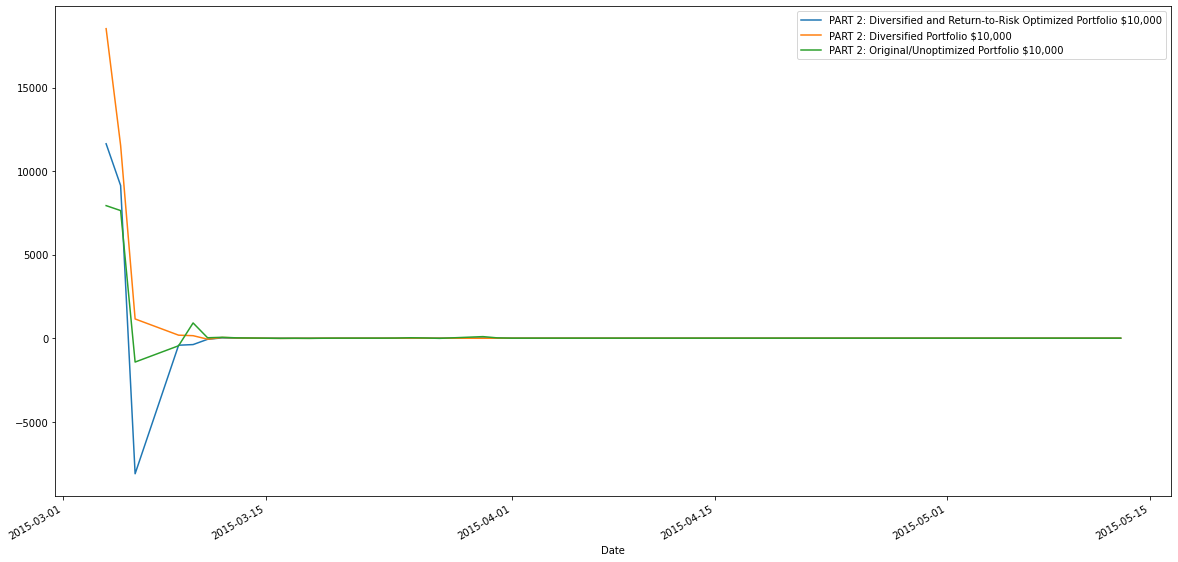

In [461]:
ax = candidate_cumulative_profits.plot(figsize=(20,10))
noncorrelated_cumulative_profits.plot(ax=ax)
unoptimized_cumulative_profits.plot(ax=ax)


ax.legend(['PART 2: Diversified and Return-to-Risk Optimized Portfolio $10,000', 
           'PART 2: Diversified Portfolio $10,000', 
           'PART 2: Original/Unoptimized Portfolio $10,000', 
           'PART 1: Risk-Optimized Portfolio $10,000'])

In [462]:
#Algorithmic stratagies out perform Whale portfolios wheres SP500 out perform compared to Algorithmic stratagies

Create Custom Portfolio

In [463]:
aapl_historical = pd.read_csv("aapl_historical.csv",index_col='Trade DATE',infer_datetime_format=True,parse_dates=True)
cost_historical = pd.read_csv("cost_historical.csv",index_col='Trade DATE',infer_datetime_format=True,parse_dates=True)
goog_historical = pd.read_csv("goog_historical.csv",index_col='Trade DATE',infer_datetime_format=True,parse_dates=True)

aapl_historical.head()

Symbol    NOCP
Trade DATE               
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75

In [464]:
cost_historical.head()

Symbol    NOCP
Trade DATE               
2019-05-09   COST  243.47
2019-05-08   COST  241.34
2019-05-07   COST  240.18
2019-05-06   COST  244.23
2019-05-03   COST  244.62

In [465]:
goog_historical.head()

Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40

In [466]:
combined = pd.concat([aapl_historical, cost_historical, goog_historical],axis='rows',join='inner')
combined = combined.reset_index()
combined.head()

Trade DATE Symbol    NOCP
0 2019-05-09   AAPL  200.72
1 2019-05-08   AAPL  202.90
2 2019-05-07   AAPL  202.86
3 2019-05-06   AAPL  208.48
4 2019-05-03   AAPL  211.75

In [467]:
combined = combined.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')
combined.head()

Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59

In [468]:
all_returns = combined.pct_change()
all_returns.head()

Symbol          AAPL      COST      GOOG
Trade DATE                              
2018-05-11       NaN       NaN       NaN
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940

In [469]:
all_returns.dropna(inplace=True)
all_returns

Symbol          AAPL      COST      GOOG
Trade DATE                              
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
2018-05-18 -0.003637 -0.003206 -0.011339
...              ...       ...       ...
2019-05-03  0.012431  0.007953  0.019602
2019-05-06 -0.015443 -0.001594  0.003366
2019-05-07 -0.026957 -0.016583 -0.012855
2019-05-08  0.000197  0.004830 -0.006669
2019-05-09 -0.010744  0.008826 -0.003335

[249 rows x 3 columns]

In [470]:
weights = [1/3, 1/3, 1/3]

portfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [471]:
all_returns["portfolio_returns"] = np.random.randint(low=22, high=65, size=249)
all_returns.head()

Symbol          AAPL      COST      GOOG  portfolio_returns
Trade DATE                                                 
2018-05-14 -0.002333  0.000613  0.001766                 64
2018-05-15 -0.009088 -0.002042 -0.019060                 55
2018-05-16  0.009333  0.016523  0.002354                 31
2018-05-17 -0.006324  0.004479 -0.002940                 35
2018-05-18 -0.003637 -0.003206 -0.011339                 31

In [472]:
all_returns.dropna(inplace=True)
all_returns

Symbol          AAPL      COST      GOOG  portfolio_returns
Trade DATE                                                 
2018-05-14 -0.002333  0.000613  0.001766                 64
2018-05-15 -0.009088 -0.002042 -0.019060                 55
2018-05-16  0.009333  0.016523  0.002354                 31
2018-05-17 -0.006324  0.004479 -0.002940                 35
2018-05-18 -0.003637 -0.003206 -0.011339                 31
...              ...       ...       ...                ...
2019-05-03  0.012431  0.007953  0.019602                 60
2019-05-06 -0.015443 -0.001594  0.003366                 29
2019-05-07 -0.026957 -0.016583 -0.012855                 64
2019-05-08  0.000197  0.004830 -0.006669                 59
2019-05-09 -0.010744  0.008826 -0.003335                 59

[249 rows x 4 columns]

In [473]:
all_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2018-05-14 to 2019-05-09
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AAPL               249 non-null    float64
 1   COST               249 non-null    float64
 2   GOOG               249 non-null    float64
 3   portfolio_returns  249 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 8.8 KB


In [474]:
annualized_std = all_returns.std() * np.sqrt(252) 
annualized_std

Symbol
AAPL                   0.296955
COST                   0.209320
GOOG                   0.263554
portfolio_returns    209.525172
dtype: float64

In [475]:
all_returns.rolling(window=21).std()

Symbol          AAPL      COST      GOOG  portfolio_returns
Trade DATE                                                 
2018-05-14       NaN       NaN       NaN                NaN
2018-05-15       NaN       NaN       NaN                NaN
2018-05-16       NaN       NaN       NaN                NaN
2018-05-17       NaN       NaN       NaN                NaN
2018-05-18       NaN       NaN       NaN                NaN
...              ...       ...       ...                ...
2019-05-03  0.013750  0.008958  0.019387          12.944570
2019-05-06  0.014384  0.008801  0.019320          13.078517
2019-05-07  0.015773  0.009391  0.019464          13.810624
2019-05-08  0.015433  0.009446  0.019499          14.127986
2019-05-09  0.015619  0.009587  0.019481          13.908545

[249 rows x 4 columns]

<AxesSubplot:xlabel='Trade DATE'>

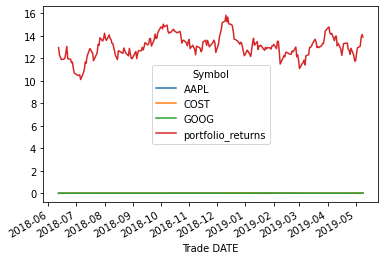

In [476]:
all_returns.rolling(window=21).std().plot()

In [477]:
correlation = all_returns.corr()
correlation

Symbol                 AAPL      COST      GOOG  portfolio_returns
Symbol                                                            
AAPL               1.000000  0.413546  0.655007          -0.072412
COST               0.413546  1.000000  0.385145          -0.054807
GOOG               0.655007  0.385145  1.000000          -0.007996
portfolio_returns -0.072412 -0.054807 -0.007996           1.000000

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

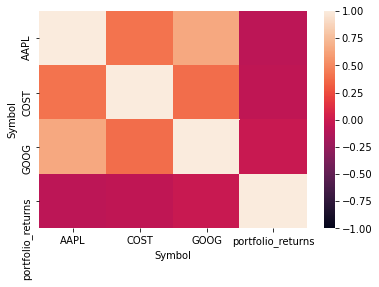

In [478]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [479]:
correlation.sum(axis=0).sort_values()

Symbol
portfolio_returns    0.864785
COST                 1.743884
AAPL                 1.996141
GOOG                 2.032155
dtype: float64

In [480]:
covariance = all_returns['COST'].cov(daily_returns['sp500_price'])
covariance

7.552203969385283e-05

In [481]:
covariance = all_returns['AAPL'].cov(daily_returns['sp500_price'])
covariance

0.00013615807352982602

In [482]:
covariance = all_returns['GOOG'].cov(daily_returns['sp500_price'])
covariance

0.0001221100976265112

In [483]:
variance = all_returns['COST'].var()
variance

0.00017386913035126206

In [484]:
variance = all_returns['GOOG'].var()
variance

0.0002756386307088458

In [485]:
variance = all_returns['AAPL'].var()
variance

0.00034993071514465105

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of COST Returns vs. S&P 500 Returns'}>

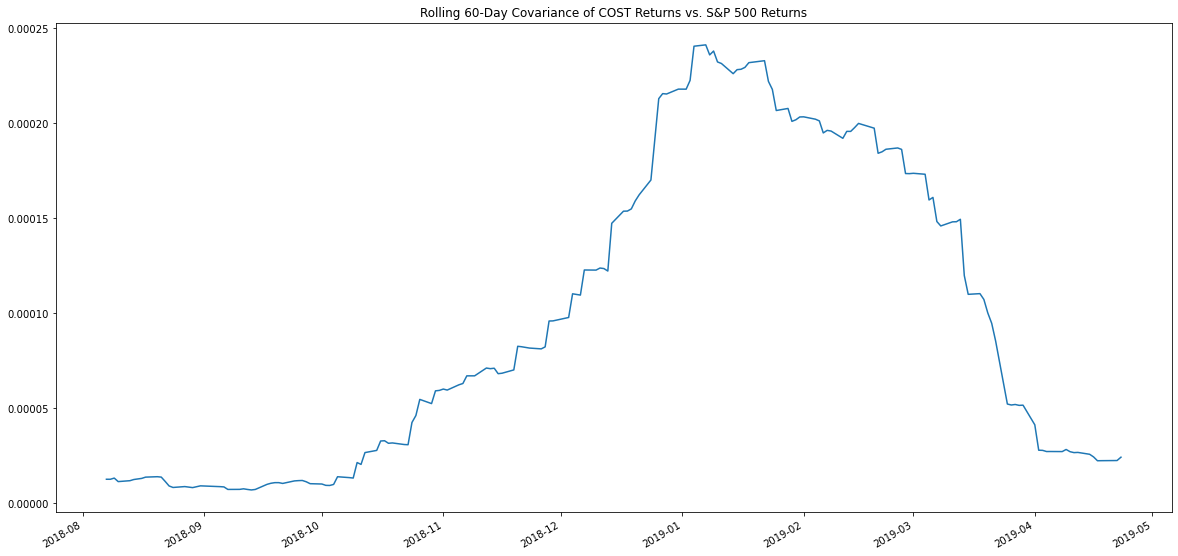

In [486]:
rolling_covariance = all_returns['COST'].rolling(window=60).cov(daily_returns['sp500_price'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of COST Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of AAPL Returns vs. S&P 500 Returns'}>

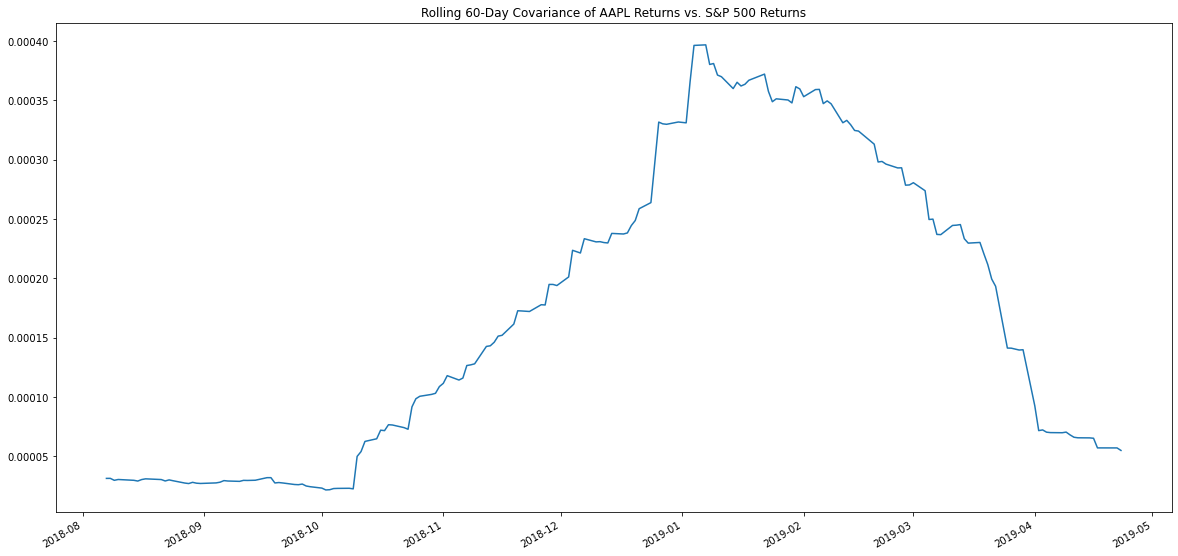

In [487]:
rolling_covariance = all_returns['AAPL'].rolling(window=60).cov(daily_returns['sp500_price'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of AAPL Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of GOOG Returns vs. S&P 500 Returns'}>

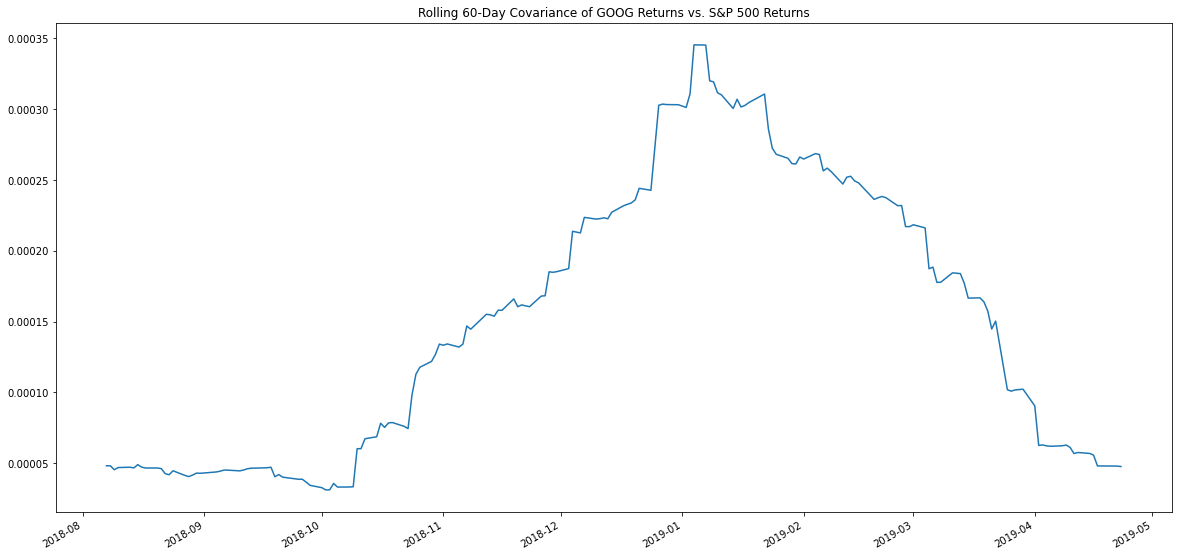

In [488]:
rolling_covariance = all_returns['GOOG'].rolling(window=60).cov(daily_returns['sp500_price'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of GOOG Returns vs. S&P 500 Returns')

In [489]:
noncorrelated_daily_returns = all_returns.drop(columns=['AAPL'])
noncorrelated_daily_returns.head()

Symbol          COST      GOOG  portfolio_returns
Trade DATE                                       
2018-05-14  0.000613  0.001766                 64
2018-05-15 -0.002042 -0.019060                 55
2018-05-16  0.016523  0.002354                 31
2018-05-17  0.004479 -0.002940                 35
2018-05-18 -0.003206 -0.011339                 31

In [490]:
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios

Symbol
COST                  1.160482
GOOG                  0.349657
portfolio_returns    52.277239
dtype: float64

<AxesSubplot:xlabel='Symbol'>

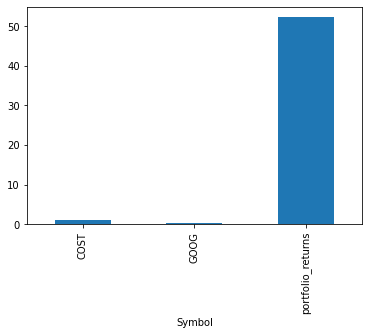

In [491]:
sharpe_ratios.plot.bar()

In [492]:
candidate_daily_returns = noncorrelated_daily_returns.drop(columns=['portfolio_returns'])
candidate_daily_returns.head()

Symbol          COST      GOOG
Trade DATE                    
2018-05-14  0.000613  0.001766
2018-05-15 -0.002042 -0.019060
2018-05-16  0.016523  0.002354
2018-05-17  0.004479 -0.002940
2018-05-18 -0.003206 -0.011339

<AxesSubplot:xlabel='Trade DATE'>

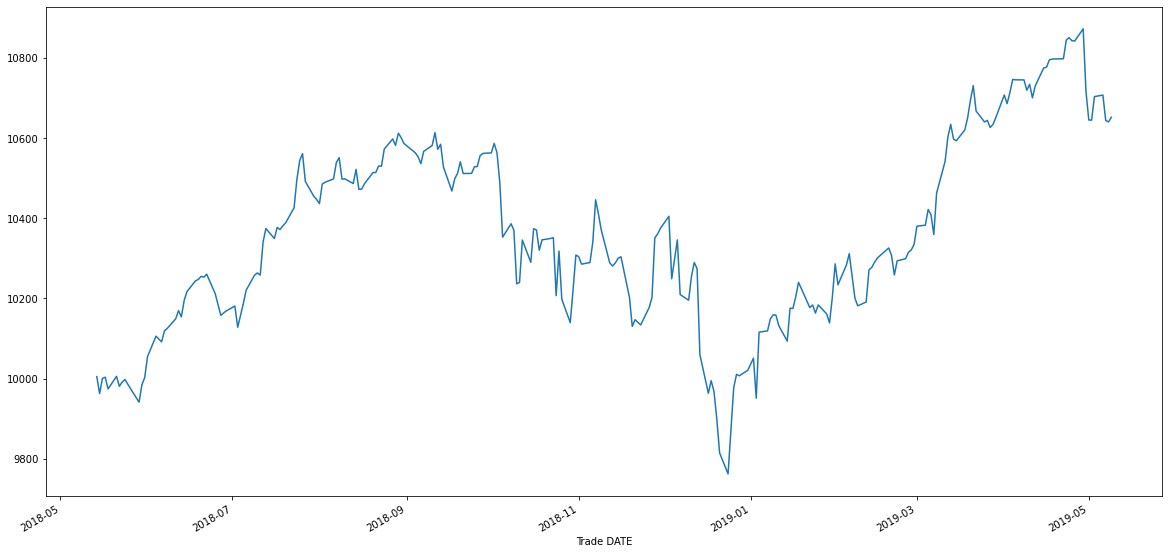

In [493]:
initial_investment = 10000
weights = [0.20, 0.20]

candidate_portfolio_returns = candidate_daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

<AxesSubplot:xlabel='Trade DATE'>

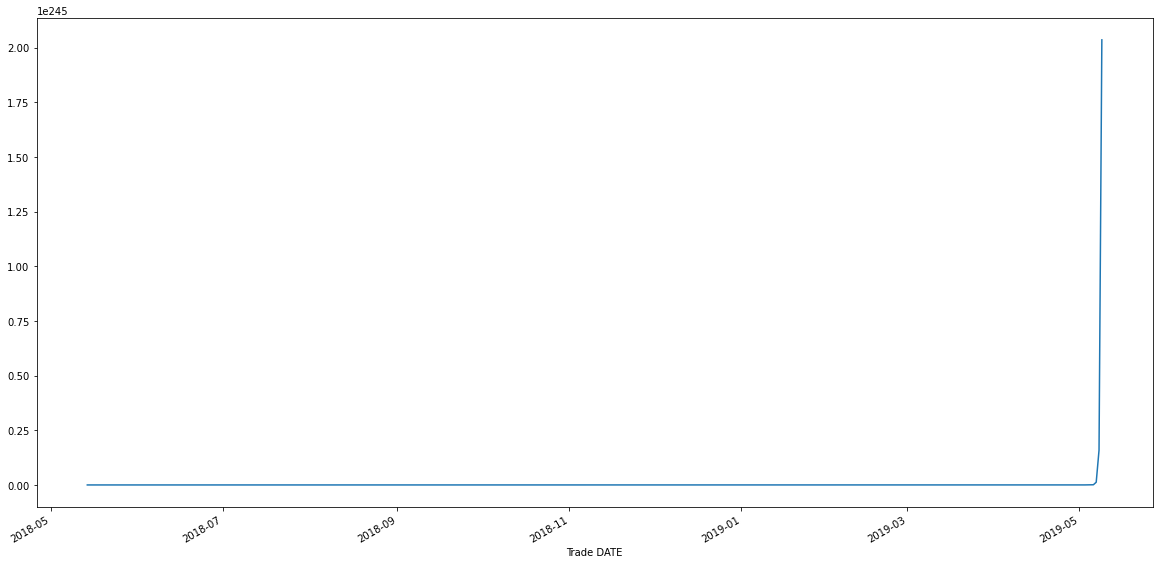

In [494]:
initial_investment = 10000
weights = [0.45, 0.35, 0.20]

noncorrelated_portfolio_returns = noncorrelated_daily_returns.dot(weights)
noncorrelated_cumulative_returns = (1 + noncorrelated_portfolio_returns).cumprod()
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_returns)
noncorrelated_cumulative_profits.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

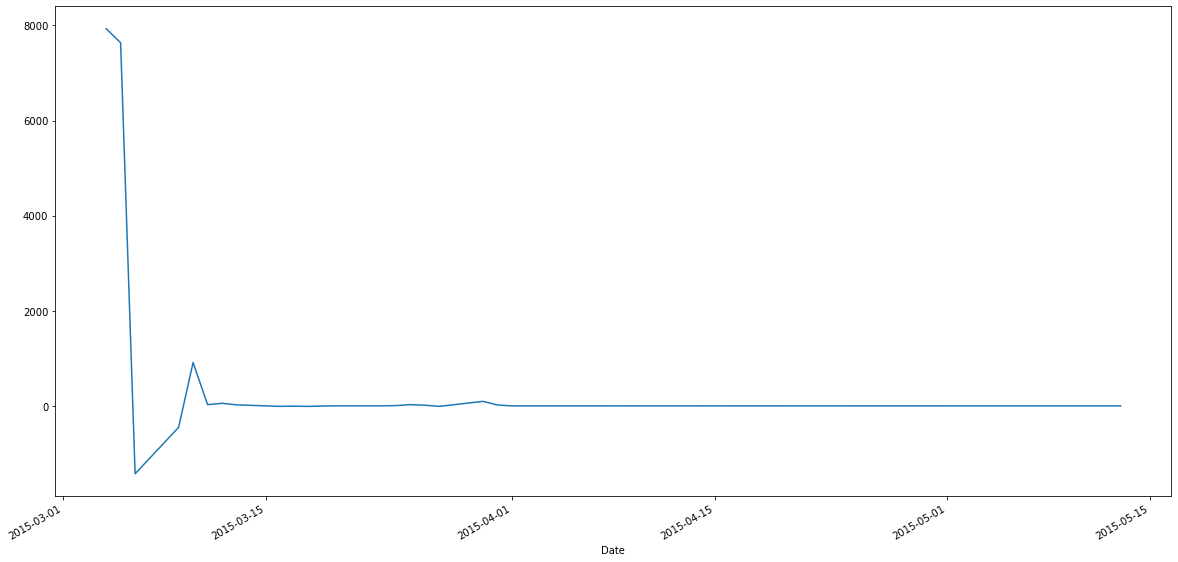

In [495]:
initial_investment = 10000
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1]

unoptimized_portfolio_returns = daily_returns.dot(weights)
unoptimized_cumulative_returns = (1 + unoptimized_portfolio_returns).cumprod()
unoptimized_cumulative_profits = (initial_investment * unoptimized_cumulative_returns)
unoptimized_cumulative_profits.plot(figsize=(20,10))

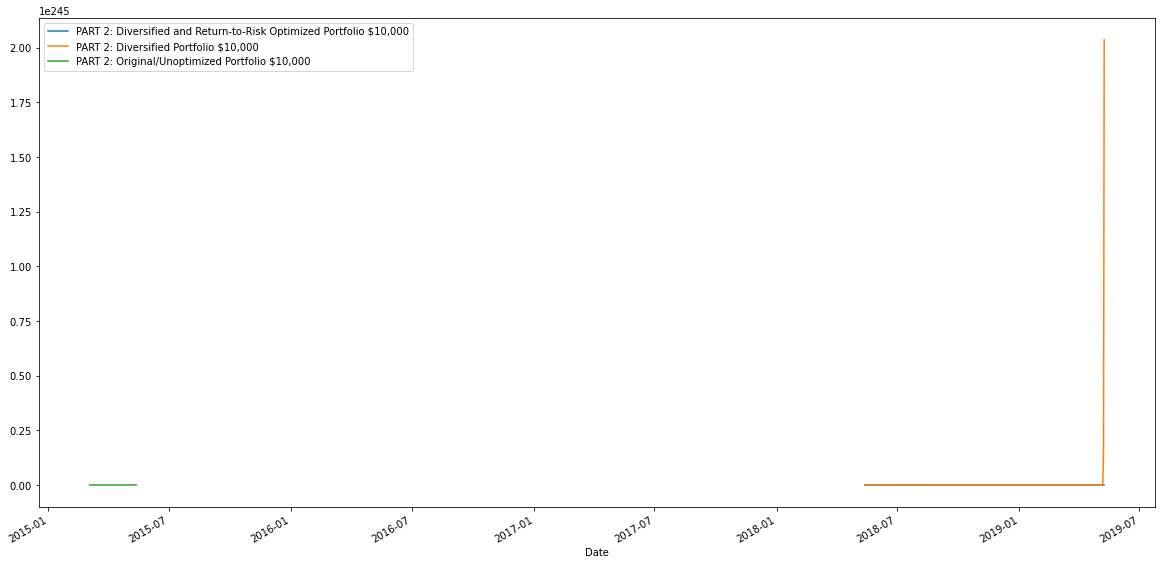

In [496]:
ax = candidate_cumulative_profits.plot(figsize=(20,10))
noncorrelated_cumulative_profits.plot(ax=ax)
unoptimized_cumulative_profits.plot(ax=ax)


ax.legend(['PART 2: Diversified and Return-to-Risk Optimized Portfolio $10,000', 
           'PART 2: Diversified Portfolio $10,000', 
           'PART 2: Original/Unoptimized Portfolio $10,000', 
           'PART 1: Risk-Optimized Portfolio $10,000'])

Portfolio suggestAAPL & GOOG stock is more stable than compare to COST.